
 #   4.10 Coding Etiquette & Excel Reporting Task - Part 1





## Table of Contents 


### Step 1 - Import libraries & dataset

### Step 2 - Address any PII data

### Step 3 - Compare customer behavior in different geographic areas

### Step 4 - Identitfy low-activity customers and exclude them from the data

### Step 5 -  Create a profiling variable

### Export the dataframe as pickle file


#### The task for this exercise has been divided to 2 script files:-
    4.10 Coding Etiquette & Excel Reporting Task-Part 1
    4.10 Coding Etiquette & Excel Reporting Task-Part 2

### Step 1 - Import libraries & dataset

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
# path of the dataset file assigned to the variable 'path'

path=r"C:\Users\19452\Desktop\Seema\Careerfoundry-Data Analytics Course\Work Area\Python Fundamentals\Nov-2023 Instacart Basket Analysis"

In [3]:
# import the data set exported in Exercise 4.9
df_merged=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','allmergedata_final.pkl'))

In [4]:
# displays all rows when listed

pd.options.display.max_rows = None

In [5]:
# displays all columns when listed

pd.options.display.max_columns = None

### Step 2 - address any PII data

#### Customer names and their age are part of this dataset.  However there aren't any sensitive data (national id, email, phone, address, passport number etc.)where personal identity can be tracked, 

### Step 3 - compare customer behavior in different geographic areas. 

In [6]:
# structure of the dataframe

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641268 entries, 0 to 32641267
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                float64       
 1   user_id                 float64       
 2   order_number            float64       
 3   orders_day_of_week      float64       
 4   order_hour_of_day       float64       
 5   days_since_prior_order  float64       
 6   product_id              float64       
 7   add_to_cart_order       float64       
 8   reordered               float64       
 9   product_name            object        
 10  aisle_id                float64       
 11  department_id           float64       
 12  prices                  float64       
 13  merge_flag              category      
 14  price_range_loc         object        
 15  Busiest days            object        
 16  busiest_period_of_day   object        
 17  max_order               float64       
 18  

In [7]:
# Region-wise distribution of states done based on wikipedia link below 
# https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [8]:
# create a column 'region' based on the 'State' column for Northeast region

df_merged.loc[(df_merged['state']=='Maine') | 
              (df_merged['state']=='New Hampshire')|
              (df_merged['state']=='Vermont') |
              (df_merged['state']=='Massachusetts') |
              (df_merged['state']=='Rhode Island') |
              (df_merged['state']=='Connecticut')|
              (df_merged['state']=='New York')|
              (df_merged['state']=='Pennsylvania')|
              (df_merged['state']=='New Jersey') ,
              'region']='Northeast'

C:\Users\19452\AppData\Local\Temp\ipykernel_46472\1339273490.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Northeast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged.loc[(df_merged['state']=='Maine') |


In [9]:
# create a column 'region' based on the 'State' column for Midwest region

df_merged.loc[(df_merged['state']=='Wisconsin') | 
              (df_merged['state']=='Michigan')|
              (df_merged['state']=='Illinois') |
              (df_merged['state']=='Indiana') |
              (df_merged['state']=='Ohio') |
              (df_merged['state']=='North Dakota')|
              (df_merged['state']=='South Dakota')|
              (df_merged['state']=='Nebraska')|
              (df_merged['state']=='Kansas')|
              (df_merged['state']=='Minnesota')|
              (df_merged['state']=='Iowa')|
              (df_merged['state']=='Missouri') ,
              'region']='Midwest'

In [10]:
# create a column 'region' based on the 'State' column for South region

df_merged.loc[(df_merged['state']=='Delaware')|
              (df_merged['state']=='Maryland')|
              (df_merged['state']=='District of Columbia')|
              (df_merged['state']=='Virginia')|
              (df_merged['state']=='West Virginia')|
              (df_merged['state']=='North Carolina')|
              (df_merged['state']=='South Carolina')|
              (df_merged['state']=='Georgia')|
              (df_merged['state']=='Florida')|
              (df_merged['state']=='Kentucky')|
              (df_merged['state']=='Tennessee')|
              (df_merged['state']=='Mississippi')|
              (df_merged['state']=='Alabama')|
              (df_merged['state']=='Oklahoma')|
              (df_merged['state']=='Texas')|
              (df_merged['state']=='Arkansas')|
              (df_merged['state']=='Louisiana'),
              'region']='South'

In [11]:
# create a column 'region' based on the 'State' column for West region

df_merged.loc[(df_merged['state']=='Idaho')|
              (df_merged['state']=='Montana')|
              (df_merged['state']=='Wyoming')|
              (df_merged['state']=='Nevada')|
              (df_merged['state']=='Utah')|
              (df_merged['state']=='Colorado')|
              (df_merged['state']=='Arizona')|
              (df_merged['state']=='New Mexico')|
              (df_merged['state']=='Alaska')|
              (df_merged['state']=='Washington')|
              (df_merged['state']=='Oregon')|
              (df_merged['state']=='California')|
              (df_merged['state']=='Hawaii'),
              'region']='West'

In [12]:
# Look for newly added values

df_merged.loc[df_merged['region']=='West'].head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,merge_flag,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average spent,spending flag,regularity,order frequency flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,family_status,income,_merge,region
338,1573906.0,21.0,10.0,3.0,10.0,6.0,196.0,2.0,0.0,Soda,77.0,7.0,9.0,both,Mid-range product,Least busy day,Most orders,34.0,Regular customer,7.012683,Low spender,8.0,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,both,West
339,3341737.0,21.0,33.0,1.0,12.0,30.0,49235.0,14.0,0.0,Organic Half & Half,53.0,16.0,1.8,both,Low-range product,Most busy day,Most orders,34.0,Regular customer,7.012683,Low spender,8.0,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,both,West
340,1854765.0,21.0,34.0,1.0,12.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,Most busy day,Most orders,34.0,Regular customer,7.012683,Low spender,8.0,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,both,West
341,1082944.0,21.0,14.0,1.0,9.0,10.0,47766.0,6.0,0.0,Organic Avocado,24.0,4.0,6.3,both,Mid-range product,Most busy day,Most orders,34.0,Regular customer,7.012683,Low spender,8.0,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,both,West
342,774475.0,21.0,16.0,1.0,11.0,7.0,47766.0,4.0,1.0,Organic Avocado,24.0,4.0,6.3,both,Mid-range product,Most busy day,Most orders,34.0,Regular customer,7.012683,Low spender,8.0,Frequent customer,Edward,Carr,Male,Montana,71,2019-06-18,0,divorced/widowed,124643,both,West


In [13]:
# look at the region and spending flag

df_merged[['region','spending flag']].head(100)

,region,spending flag
0,South,Low spender
1,South,Low spender
2,South,Low spender
3,South,Low spender
4,South,Low spender
5,South,Low spender
6,South,Low spender
7,South,Low spender
8,South,Low spender
9,South,Low spender


In [14]:
# check the data type of new column 'region'

df_merged.region.dtype

dtype('O')

In [15]:
# find the frequency of values in 'region' column

df_merged['spending flag'].value_counts(dropna=False)

spending flag
Low spender     32001233
High spender      640035
Name: count, dtype: int64

In [16]:
# Effects on spending based on region
# Create pivot table that aggregates spending habits based on region.

df_merged_2 = df_merged.pivot_table(index = 'region', columns = 'spending flag', aggfunc = 'size', fill_value = 0)

In [17]:
df_merged_2

spending flag,High spender,Low spender
region,,
Midwest,157347,7495188
Northeast,109159,5655673
South,211695,10659024
West,161834,8191348


In [18]:
# Total spent in each region

df_merged.groupby('region')['prices'].sum()

region
Midwest      59198328.50
Northeast    44533746.96
South        84115600.01
West         64600488.16
Name: prices, dtype: float64

### Spending habits based on regions in the US:-  

#### -South spends the highest
#### -West spends the 2nd highest
#### -Next comes Midwest
#### -Northeast has the least spending habit

### Step 4 - create an exclusion flag for low-activity customers and exclude them from the data.  Export this sample.

In [19]:
# Create a column 'exclusion_flag' with 'max_order' less than 5 condition

df_merged.loc[df_merged['max_order']<5,'exclusion_flag']='Exclude <5 orders'

C:\Users\19452\AppData\Local\Temp\ipykernel_46472\3037441016.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Exclude <5 orders' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged.loc[df_merged['max_order']<5,'exclusion_flag']='Exclude <5 orders'


In [20]:
# Create a column 'exclusion_flag' with 'max_order' greater than or equal to 5 condition

df_merged.loc[df_merged['max_order']>=5,'exclusion_flag']='Keep >=5 orders'

In [21]:
# Look at the value count of 'exclusion_flag' column

df_merged['exclusion_flag'].value_counts(dropna=False)

exclusion_flag
Keep >=5 orders      31929979
Exclude <5 orders      711289
Name: count, dtype: int64

In [22]:
# assign rows to be excluded to the dataframe 'df_exclude'

df_exclude=df_merged[df_merged['exclusion_flag']=='Exclude <5 orders']

In [23]:
# dimension of the dataframe

df_exclude.shape

(711289, 35)

In [24]:
# assign rows to be kept to the dataframe 'df_keep'

df_keep=df_merged[df_merged['exclusion_flag']=='Keep >=5 orders']

In [25]:
# dimension of the dataframe

df_keep.shape

(31929979, 35)

In [26]:
# export df_exclude dataframe with below 5 orders to 'Exclude_below5_ordrs.csv'

df_exclude.to_csv(os.path.join(path,'02 Data','Prepared Data','Exclude_below5_ordrs.csv'))

### Step 5 - Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

#### Create age category

In [27]:
df_keep.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average spent,regularity,age,date_joined,no_of_dependants,income
count,31929979.00000,31929979.00000,31929979.00000,31929979.00000,31929979.00000,30079546.00000,31747756.00000,31747756.00000,31747756.00000,31718127.00000,31718127.00000,31718127.00000,31929979.00000,31929979.00000,31929979.00000,31929979.00000,31929979.00000,31929979.00000,31929979.00000
mean,1710487.36339,102950.31185,17.47409,2.74034,13.41951,11.00350,25576.30149,8.35625,0.59804,71.19179,9.92081,7.79037,34.60900,11.96174,10.22096,49.46709,.5f,1.50183,99533.43049
min,2.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,5.00000,1.00000,0.00000,18.00000,.5f,0.00000,25903.00000
25%,855515.00000,51439.00000,5.00000,1.00000,10.00000,5.00000,13535.00000,3.00000,0.00000,31.00000,4.00000,4.20000,15.00000,7.38958,6.00000,33.00000,.5f,1.00000,67124.00000
50%,1710642.00000,102629.00000,11.00000,3.00000,13.00000,8.00000,25256.00000,6.00000,1.00000,83.00000,9.00000,7.40000,28.00000,7.82500,8.00000,49.00000,.5f,2.00000,96674.00000
75%,2565411.00000,154409.00000,24.00000,5.00000,16.00000,15.00000,37935.00000,11.00000,1.00000,107.00000,16.00000,11.30000,49.00000,8.25241,13.00000,65.00000,.5f,3.00000,127975.00000
max,3421083.00000,206209.00000,100.00000,6.00000,23.00000,30.00000,49688.00000,145.00000,1.00000,134.00000,21.00000,25.00000,100.00000,15006.94000,30.00000,81.00000,.5f,3.00000,593901.00000
std,987371.98398,59467.35735,17.57683,2.08991,4.24764,8.71137,14095.20091,7.13096,0.49029,38.21591,6.28193,4.24114,25.02192,82.04553,6.93140,18.48690,nan,1.11883,43086.91645


#### The age of customers are 33 at 25th percentile, 49 at 50th percentile and 65 at 75th percentile.  Based on this distribution, age_flag catagories have been decided.

In [28]:
# create 'age_flag' column based on 'age' less than 33

df_keep.loc[(df_keep['age']<33),'age_flag']="Young adult"

C:\Users\19452\AppData\Local\Temp\ipykernel_46472\3731676495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep.loc[(df_keep['age']<33),'age_flag']="Young adult"
C:\Users\19452\AppData\Local\Temp\ipykernel_46472\3731676495.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_keep.loc[(df_keep['age']<33),'age_flag']="Young adult"


In [29]:
# create 'age_flag' column based on 'age' for ages between 33 & 65

df_keep.loc[(df_keep['age']>=33) & (df_keep['age']<65),'age_flag']="Middle aged"

In [30]:
# create 'age_flag' column based on 'age' for ages above 65

df_keep.loc[df_keep['age']>=65,'age_flag']="Senior citizen"

In [31]:
# Look at the value count of 'age_flag' column

df_keep['age_flag'].value_counts(dropna=False)

age_flag
Middle aged       15964839
Senior citizen     8450848
Young adult        7514292
Name: count, dtype: int64

#### Create income category

#### The income of customers are 67157 at 25th percentile, 96700 at 50th percentile and 127988 at 75th percentile.  Based on this distribution, income_flag catagories have been decided.

In [32]:
# create 'income_flag' column based on 'income' less than 67157

df_keep.loc[df_keep['income']<67157,'income_flag']="Low income"

C:\Users\19452\AppData\Local\Temp\ipykernel_46472\3348243472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep.loc[df_keep['income']<67157,'income_flag']="Low income"
C:\Users\19452\AppData\Local\Temp\ipykernel_46472\3348243472.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_keep.loc[df_keep['income']<67157,'income_flag']="Low income"


In [33]:
# create 'income_flag' column based on 'income' between 67157 and 96700

df_keep.loc[(df_keep['income']>=67157) & (df_keep['income']<96700),'income_flag']="Medium income"

In [34]:
# create 'income_flag' column based on 'income' between 96700 and 127988

df_keep.loc[(df_keep['income']>=96700) & (df_keep['income']<127988),'income_flag']="High income"

In [35]:
# create 'income_flag' column based on 'income' greater than 127988

df_keep.loc[df_keep['income']>=127988,'income_flag']="Very high income"

#### Orders during the week showing weekdays on x-axis

In [36]:
df_keep['orders_day_of_week'].value_counts()

orders_day_of_week
0.0    6107725
1.0    5572954
6.0    4428913
5.0    4152834
2.0    4147880
3.0    3785966
4.0    3733707
Name: count, dtype: int64

In [37]:
# creating a data list

orders_week_flag_data={'Saturday':6107725,'Sunday':5572954,'Monday':4147880,'Tuesday':3785966,'Wednesday':3733707,'Thursday':4152834,'Friday':4428913}
week_category=list(orders_week_flag_data.keys())
week_count=list(orders_week_flag_data.values())
colors=['maroon','maroon','rosybrown','indianred','indianred','rosybrown','rosybrown']

In [38]:
# setting the size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

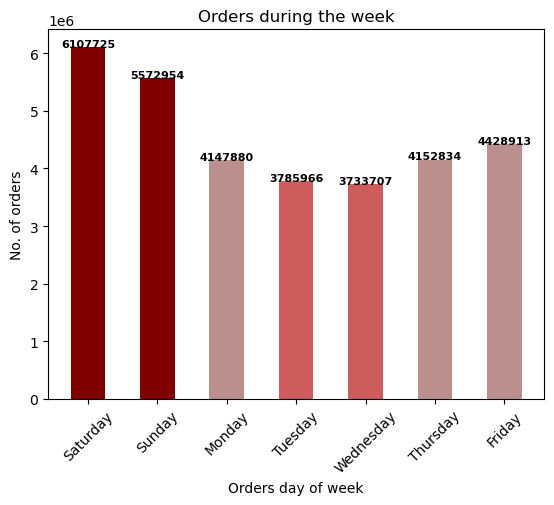

In [39]:
# Generate a bar chart
bar_week=plt.bar(week_category,week_count,color=colors,width=0.5)


# Add value labels
# i is the index and v the value (these are used to position the values on the correct bar)
# enumerate generates the inbuilt counter 
for i,v in enumerate(week_count):
    plt.text(i,v+3000, str(v), ha="center",weight="bold",size=8)
    
# X axis label
plt.xlabel('Orders day of week')

# rotates the x axis labels to 45 degrees
plt.xticks(rotation=45)

# Y axis label
plt.ylabel('No. of orders')

# chart title
plt.title('Orders during the week')

# save barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Orders_dow_barplot.png'),bbox_inches='tight')

#plt.show()

#### create a bar chart to show the correlation between age and income

In [40]:
a=df_keep.groupby('age').agg({'income': ['mean']})
print(a)

            income
              mean
age               
18    70545.347554
19    69846.582435
20    70853.813320
21    70615.261137
22    69929.339486
23    70845.906090
24    71970.733943
25    71122.244256
26    70588.893926
27    70666.206525
28    69554.879828
29    70354.719548
30    69562.268349
31    70206.951395
32    70195.232941
33    70787.052373
34    70861.982522
35    71409.708101
36    71133.904567
37    70403.755769
38    69910.599760
39    70835.787490
40    70957.557743
41   116646.383164
42   116783.089171
43   117039.666820
44   114968.607989
45   117671.392574
46   115610.457727
47   115395.554130
48   117520.710235
49   116950.596059
50   116206.432615
51   115016.314135
52   114488.995061
53   114929.624003
54   115318.700646
55   112955.556722
56   117209.807107
57   116020.397699
58   116008.484084
59   114610.343229
60   115349.963001
61   116140.859081
62   115430.058137
63   116958.049210
64   116682.651776
65   116852.996475
66   115107.025044
67   115398.

In [41]:
df_keep['income'].value_counts(dropna=False)

income
72344     4397
112610    4266
57501     4155
115620    3835
36163     3660
97928     3452
125077    3421
94497     3403
99954     3396
50556     3225
118872    3220
105378    3212
152166    3207
97402     3185
52769     3122
72170     3110
113016    3087
109407    3077
164011    3041
55237     3026
82853     3014
96505     2999
70584     2991
108453    2960
57242     2955
117606    2948
109599    2924
138180    2922
39830     2912
65240     2908
141212    2908
41914     2883
98333     2874
99155     2867
92898     2854
96918     2845
63243     2843
100426    2841
88471     2837
38077     2830
62804     2814
66145     2813
143713    2808
92162     2787
118816    2749
41299     2748
110936    2746
54014     2723
85676     2720
64258     2720
63330     2717
93689     2710
111228    2708
145129    2698
57256     2694
67477     2693
73495     2690
103157    2663
154809    2654
120977    2635
95710     2617
68848     2612
62963     2601
37788     2597
114171    2596
99018     2594
128

In [42]:
# creating a data list

age_income_data={'18':70545,'19':69847,'20':70854,'21':70615,'22':69929,'23':70846,'24':71971,'25':71122,'26':70589,'27':70666,'28':69555,'29':70355,'30':69562,'31':70207,'32':70195,'33':70787,'34':70862,'35':71410,'36':71134,'37':70404,'38':69916,'39':70836,'40':70958,'41':116646,'42':116783,'43':117040,'44':114969,'45':117671,'46':115610,'47':115396,'48':117521,'49':116955,'50':116206,'51':115016,'52':114489,'53':114930,'54':115319,'55':112956,'56':117210,'57':116020,'58':116008,'59':114610,'60':115350,'61':116141,'62':115430,'63':116958,'64':116683,'65':116853,'66':115107,'67':115398,'68':116007,'69':115930,'70':113487,'71':114773,'72':117422,'73':115138,'74':114944,'75':118015,'76':115077,'77':116711,'78':117270,'79':115314,'80':114338,'81':115231}

income_category=list(age_income_data.keys())
income_count=list(age_income_data.values())
# colors=['maroon','maroon','rosybrown','indianred','indianred','rosybrown','rosybrown']

In [43]:
# setting the size of the bar chart
plt.figure(figsize=(50,50))

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

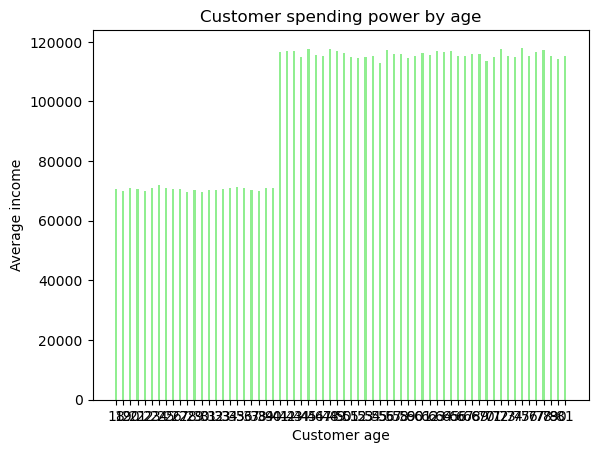

In [80]:
# Generate a bar chart
bar_income=plt.bar(income_category,income_count,color='lightgreen',width=.3)

# X axis label
plt.xlabel('Customer age')

# rotates the x axis labels to 45 degrees
# plt.xticks(size='xx-small',linespacing=5,rotation=45)
# There is no space to display ages 18-81 on x-axis. So change the tick frequency on x axis.
# plt.xticks([0,10,20,30,40,50,60,70,80])

# Y axis label
plt.ylabel('Average income')

# chart title
plt.title('Customer spending power by age')

# save barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_age_spending.png'),bbox_inches='tight')
plt.show()

#### Create number of dependents category 

In [47]:
# create 'dependants_flag' column based on 'no_of_dependants' 

df_keep.loc[df_keep['no_of_dependants']==0,'dependants_flag']="No dependants"

C:\Users\19452\AppData\Local\Temp\ipykernel_46472\477517791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep.loc[df_keep['no_of_dependants']==0,'dependants_flag']="No dependants"
C:\Users\19452\AppData\Local\Temp\ipykernel_46472\477517791.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_keep.loc[df_keep['no_of_dependants']==0,'dependants_flag']="No dependants"


In [48]:
# create 'dependants_flag' column based on 'no_of_dependants'

df_keep.loc[df_keep['no_of_dependants']>0,'dependants_flag']="Have dependants"

In [49]:
df_keep['dependants_flag'].value_counts(dropna=False)

dependants_flag
Have dependants    23950452
No dependants       7979527
Name: count, dtype: int64

#### Create customer profiles

#### The following 24 customer profiles would be created below:
    
1)Young adult-Low income-No dependants
2)Young adult-Medium income-No dependants
3)Young adult-High income-No dependants
4)Young adult-Very high income-No dependants

5)Middle aged-Low income-No dependants
6)Middle aged-Medium income-No dependants
7)Middle aged-High income-No dependants
8)Middle aged-Very high income-No dependants

9)Senior citizen-Low income-No dependants
10)Senior citizen-Medium income-No dependants
11)Senior citizen-High income-No dependants
12)Senior citizen-Very high income-No dependants

13)Young adult-Low income-Have dependants
14)Young adult-Medium income-Have dependants
15)Young adult-High income-Have dependants
16)Young adult-Very high income-Have dependants

17)Middle aged-Low income-Have dependants
18)Middle aged-Medium income-Have dependants
19)Middle aged-High income-Have dependants
20)Middle aged-Very high income-Have dependants

21)Senior citizen-Low income-Have dependants
22)Senior citizen-Medium income-Have dependants
23)Senior citizen-High income-Have dependants
24)Senior citizen-Very high income-Have dependants


#### create 'customer_profile' column with profiles 1,2,3 & 4

In [50]:
df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='Low income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Young adult-Low income-No dependants"

C:\Users\19452\AppData\Local\Temp\ipykernel_46472\311070257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='Low income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Young adult-Low income-No dependants"
C:\Users\19452\AppData\Local\Temp\ipykernel_46472\311070257.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young adult-Low income-No dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='Low income') & (df_keep['dependants_flag']=='No dependant

In [51]:
df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='Medium income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Young adult-Medium income-No dependants"

In [52]:
df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='High income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Young adult-High income-No dependants"

In [53]:
df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='Very high income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Young adult-Very high income-No dependants"

#### create 'customer_profile' column with profiles 5,6,7 & 8

In [54]:
df_keep.loc[(df_keep['age_flag']=='Middle aged') & (df_keep['income_flag']=='Low income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Middle aged-Low income-No dependants"

In [55]:
df_keep.loc[(df_keep['age_flag']=='Middle aged') & (df_keep['income_flag']=='Medium income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Middle aged-Medium income-No dependants"

In [56]:
df_keep.loc[(df_keep['age_flag']=='Middle aged') & (df_keep['income_flag']=='High income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Middle aged-High income-No dependants"

In [57]:
df_keep.loc[(df_keep['age_flag']=='Middle aged') & (df_keep['income_flag']=='Very high income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Middle aged-Very high income-No dependants"

#### create 'customer_profile' column with profiles 9,10,11 & 12

In [58]:
df_keep.loc[(df_keep['age_flag']=='Senior citizen') & (df_keep['income_flag']=='Low income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Senior citizen-Low income-No dependants"

In [59]:
df_keep.loc[(df_keep['age_flag']=='Senior citizen') & (df_keep['income_flag']=='Medium income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Senior citizen-Medium income-No dependants"

In [60]:
df_keep.loc[(df_keep['age_flag']=='Senior citizen') & (df_keep['income_flag']=='High income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Senior citizen-High income-No dependants"

In [61]:
df_keep.loc[(df_keep['age_flag']=='Senior citizen') & (df_keep['income_flag']=='Very high income') & (df_keep['dependants_flag']=='No dependants'),'customer_profile']="Senior citizen-Very high income-No dependants"

#### create 'customer_profile' column with profiles 13,14,15 & 16

In [62]:
df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='Low income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Young adult-Low income-Have dependants"

In [63]:
df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='Medium income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']='Young adult-Medium income-Have dependants'

In [64]:
df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='High income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Young adult-High income-Have dependants"

In [65]:
df_keep.loc[(df_keep['age_flag']=='Young adult') & (df_keep['income_flag']=='Very high income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Young adult-Very high income-Have dependants"

#### create 'customer_profile' column with profiles 17,18,19 & 20

In [66]:
df_keep.loc[(df_keep['age_flag']=='Middle aged') & (df_keep['income_flag']=='Low income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Middle aged-Low income-Have dependants"

In [67]:
df_keep.loc[(df_keep['age_flag']=='Middle aged') & (df_keep['income_flag']=='Medium income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Middle aged-Low income-Have dependants"

In [68]:
df_keep.loc[(df_keep['age_flag']=='Middle aged') & (df_keep['income_flag']=='High income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Middle aged-High income-Have dependants"

In [69]:
df_keep.loc[(df_keep['age_flag']=='Middle aged') & (df_keep['income_flag']=='Very high income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Middle aged-Very high income-Have dependants"

#### create 'customer_profile' column with profiles 21,22,23 & 24

In [70]:
df_keep.loc[(df_keep['age_flag']=='Senior citizen') & (df_keep['income_flag']=='Low income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Senior citizen-Low income-Have dependants"

In [71]:
df_keep.loc[(df_keep['age_flag']=='Senior citizen') & (df_keep['income_flag']=='Medium income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Senior citizen-Medium income-Have dependants"

In [72]:
df_keep.loc[(df_keep['age_flag']=='Senior citizen') & (df_keep['income_flag']=='High income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Senior citizen-High income-Have dependants"

In [73]:
df_keep.loc[(df_keep['age_flag']=='Senior citizen') & (df_keep['income_flag']=='Very high income') & (df_keep['dependants_flag']=='Have dependants'),'customer_profile']="Senior citizen-Very high income-Have dependants"

In [74]:
# Count of each customer_profile

df_keep['customer_profile'].value_counts(dropna=False)

customer_profile
Middle aged-Low income-Have dependants             5097847
Middle aged-Very high income-Have dependants       3469757
Middle aged-High income-Have dependants            3377198
Young adult-Medium income-Have dependants          2609069
Young adult-Low income-Have dependants             2602928
Senior citizen-Very high income-Have dependants    2441710
Senior citizen-High income-Have dependants         2229153
Middle aged-Very high income-No dependants         1189330
Middle aged-High income-No dependants              1129342
Young adult-Low income-No dependants                872780
Middle aged-Low income-No dependants                859681
Senior citizen-Medium income-Have dependants        855842
Young adult-Medium income-No dependants             852217
Middle aged-Medium income-No dependants             841684
Senior citizen-Low income-Have dependants           836020
Senior citizen-Very high income-No dependants       795698
Senior citizen-High income-No dependant

In [75]:
# Export dataframe to Prepared Data foler as 'profilingdata.pkl' file

df_keep.to_pickle(os.path.join(path,'02 Data','Prepared Data','profilingdata.pkl'))